In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
import random
import pathlib
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-11-02 22:08:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 142.250.152.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M   134MB/s    in 4.1s    

2021-11-02 22:08:04 (121 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [ ]:
#Food-101 dataset with 10 classes
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print (f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [ ]:
#Set up the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
#Lets get the class names
#Method1 : If we do not want to use tensorlow for this
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print (data_dir)
print (class_names)

10_food_classes_all_data/train
['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
def view_random_image(target_dir, target_class):
  #set up the target directory
  target_folder = target_dir + target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print (random_image)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print (f'Image shape : {img.shape}')

  return img

['1304492.jpg']
Image shape : (512, 512, 3)


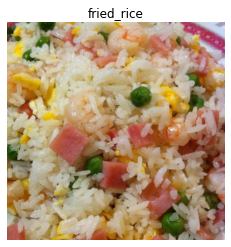

In [ ]:
img = view_random_image(train_dir, target_class=random.choice(class_names))

In [ ]:
#Now lets preprocess the data (prepare the data for the model)

tf.random.set_seed(42)

#Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#set up paths for our data directories
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode='categorical', seed=42)
test_data = valid_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224), class_mode='categorical', seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Now create a CNN model for classification

In [ ]:
tf.random.set_seed(42)

model1 = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu, input_shape=(224,224,3)),
                                     tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
                                     tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28090)            

In [ ]:
#Lets fit the model now for the new dataset
history1 = model1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 86s 236ms/step - loss: 2.1481 - accuracy: 0.2045 - val_loss: 2.0294 - val_accuracy: 0.2656
Epoch 2/5
235/235 [==============================] - 54s 232ms/step - loss: 1.9401 - accuracy: 0.3219 - val_loss: 1.9137 - val_accuracy: 0.3280
Epoch 3/5
235/235 [==============================] - 54s 230ms/step - loss: 1.6831 - accuracy: 0.4352 - val_loss: 1.9023 - val_accuracy: 0.3504
Epoch 4/5
235/235 [==============================] - 54s 230ms/step - loss: 1.2140 - accuracy: 0.5913 - val_loss: 2.0766 - val_accuracy: 0.3340
Epoch 5/5
235/235 [==============================] - 55s 234ms/step - loss: 0.5742 - accuracy: 0.8181 - val_loss: 2.9757 - val_accuracy: 0.3000


In [ ]:
#Lets now evaluate the model
model1.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 2.9757 - accuracy: 0.3000


[2.975677728652954, 0.30000001192092896]

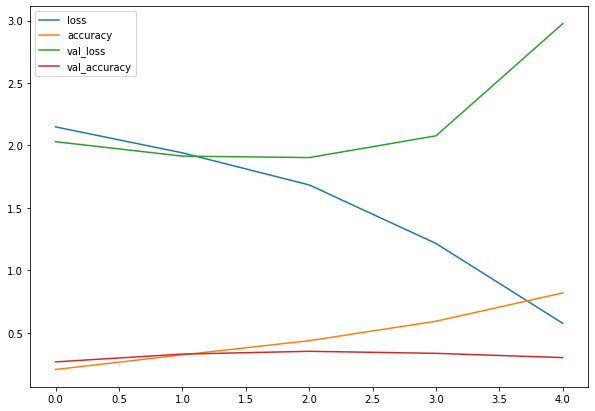

In [ ]:
#Now lets plot the loss curves
pd.DataFrame(history1.history).plot(figsize=(10,7))

From the above graph, we realise that our model is over-fitting

1. Lets simply the model first

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu, input_shape=(224,224,3)),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
                                     tf.keras.layers.MaxPool2D(2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

In [ ]:
history2 = model2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 50s 212ms/step - loss: 2.1085 - accuracy: 0.2483 - val_loss: 1.9549 - val_accuracy: 0.3164
Epoch 2/5
235/235 [==============================] - 49s 209ms/step - loss: 1.8008 - accuracy: 0.3835 - val_loss: 1.8792 - val_accuracy: 0.3464
Epoch 3/5
235/235 [==============================] - 49s 210ms/step - loss: 1.4620 - accuracy: 0.5116 - val_loss: 1.9398 - val_accuracy: 0.3396
Epoch 4/5
235/235 [==============================] - 49s 210ms/step - loss: 1.0164 - accuracy: 0.6856 - val_loss: 2.0949 - val_accuracy: 0.3416
Epoch 5/5
235/235 [==============================] - 49s 209ms/step - loss: 0.5835 - accuracy: 0.8308 - val_loss: 2.4825 - val_accuracy: 0.3160


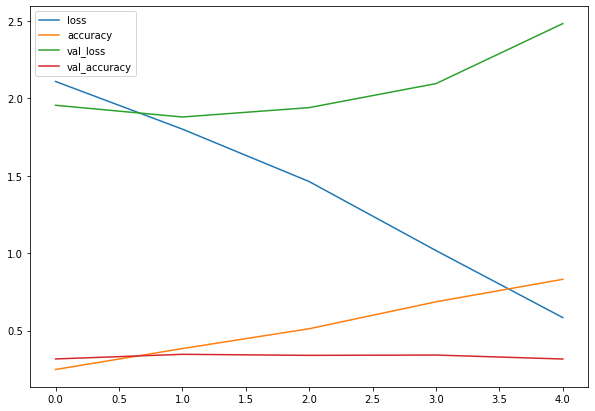

In [ ]:
#Now lets plot the loss curves
pd.DataFrame(history2.history).plot(figsize=(10,7))

2. Lets now try data augmentation

In [ ]:
#Now lets visualise data augmentation by importing it (augmentation is only performed on training data)

#Preprocess data
train_datagen_augmented = ImageDataGenerator(rescale=1./255, 
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#set up paths for our data directories
train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

#Import data from directories and turn it into batches
print ("Augmented Train data")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode='categorical', shuffle=True, seed=42)
print ("Non-Augmented Train data")
train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode='categorical', shuffle=True, seed=42)
print ("Non-Augmented Test data")
test_data = test_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224), class_mode='categorical', seed=42)

Augmented Train data
Found 7500 images belonging to 10 classes.
Non-Augmented Train data
Found 7500 images belonging to 10 classes.
Non-Augmented Test data
Found 2500 images belonging to 10 classes.


#####**Cloning model1**

In [ ]:
#Now lets clone model1
model3 = tf.keras.models.clone_model(model1)

model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history3 = model3.fit(train_data_augmented, 
                      epochs=5, 
                      steps_per_epoch=len(train_data_augmented), 
                      validation_data=test_data, 
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 126s 535ms/step - loss: 2.3017 - accuracy: 0.1128 - val_loss: 2.2660 - val_accuracy: 0.1264
Epoch 2/5
235/235 [==============================] - 127s 539ms/step - loss: 2.2688 - accuracy: 0.1539 - val_loss: 2.2254 - val_accuracy: 0.1844
Epoch 3/5
235/235 [==============================] - 128s 546ms/step - loss: 2.2433 - accuracy: 0.1656 - val_loss: 2.1988 - val_accuracy: 0.2012
Epoch 4/5
235/235 [==============================] - 126s 535ms/step - loss: 2.2067 - accuracy: 0.1924 - val_loss: 2.0910 - val_accuracy: 0.2540
Epoch 5/5
235/235 [==============================] - 127s 541ms/step - loss: 2.1312 - accuracy: 0.2395 - val_loss: 2.0011 - val_accuracy: 0.3040


In [ ]:
model3.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 2.0011 - accuracy: 0.3040


[2.0011215209960938, 0.30399999022483826]

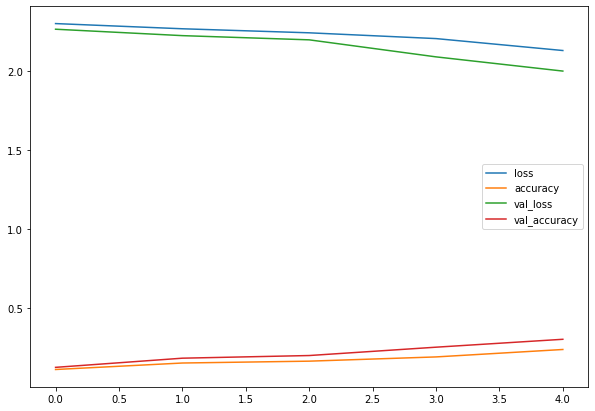

In [ ]:
#Now lets plot the loss curves
pd.DataFrame(history3.history).plot(figsize=(10,7))

In [ ]:
#Make a prediction with one of our custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-11-03 00:13:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2021-11-03 00:13:25 (43.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2021-11-03 00:13:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
#Write a helper function to pre-process the image for us to predict the result of the downloaded image
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img


In [ ]:
#Now write a helper function to decipher this prediction probability which shows up above
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  
  #Adding logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else :
    pred_class = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"Prediction :  {pred_class}")
  plt.axis(False)

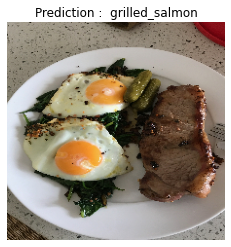

In [ ]:
#pred_and_plot(model3, '03-hamburger.jpeg', class_names=class_names)
#pred_and_plot(model3, '03-pizza-dad.jpeg', class_names=class_names)
pred_and_plot(model3, '03-steak.jpeg', class_names=class_names)

###Now lets save and reload the model which is very helpful

In [ ]:
#Save a model
model3.save("saved_trained_model3")

INFO:tensorflow:Assets written to: saved_trained_model3/assets


In [ ]:
#Load in the saved model
loaded_model3 = tf.keras.models.load_model("saved_trained_model3")
loaded_model3.evaluate(test_data)

79/79 [==============================] - 13s 164ms/step - loss: 2.0011 - accuracy: 0.3040


[2.0011210441589355, 0.30399999022483826]